In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with fits.open('DistantClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas()
df_NGC = df[(df['Cluster']=='NGC2682 ')]
df_NGC.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)
x = np.array(df_NGC['gmag'])
y = np.array(df_NGC['bpmag']- df_NGC['rpmag'])
x_s1 = []
y_s1=[]
for i in range(len(x)):
    if y[i] >=0.7:
        x_s1.append(x[i])
        y_s1.append(y[i])

<ipython-input-2-5a42d7c44b20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NGC.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


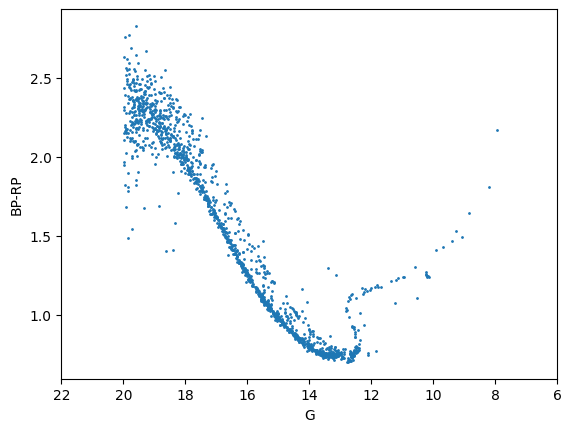

In [4]:
#draw the scatter plot for the two sets of data
plt.scatter(x_s1, y_s1, s = 1)
plt.xlim(22,6)
plt.xlabel('G')
plt.ylabel('BP-RP')
plt.show()

In [8]:
model = np.polyfit(x_s1, y_s1, 10)
predict = np.poly1d(model)
x_lin_reg = range(6, 23)
y_lin_reg = predict(x_lin_reg)

crit = predict.deriv().r
r_crit = crit[crit.imag==0].real
#test = predict.deriv(2)(r_crit) 


# compute local minima 
# excluding range boundaries
#x_min = r_crit[test>0]
#y_min = predict(x_min)
#x_min

/Users/chris.w/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([285.71378876,  13.14646027])

In [55]:
crit = predict.deriv().r
r_crit = crit[crit.imag==0].real
test = predict.deriv()(r_crit)
test
#r_crit
r_crit[test>0]

array([13.14646027])